# Importing Libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
%matplotlib inline

## Importing Dataset

In [26]:
df = pd.read_csv('datasets/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Basic Overview

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Replacing Values of the target column

In [34]:
df['species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Basic Visulaization to understand the data

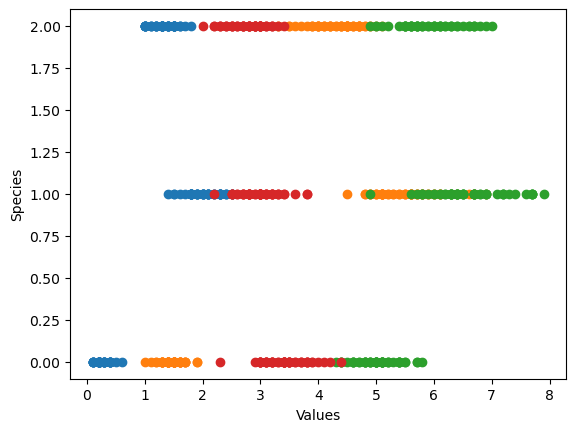

In [63]:
plt.scatter(df['petal_width'], df['species'])
plt.scatter(df['petal_length'], df['species'])
plt.scatter(df['sepal_length'], df['species'])
plt.scatter(df['sepal_width'], df['species'])
plt.xlabel('Values')
plt.ylabel('Species')
plt.show()

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

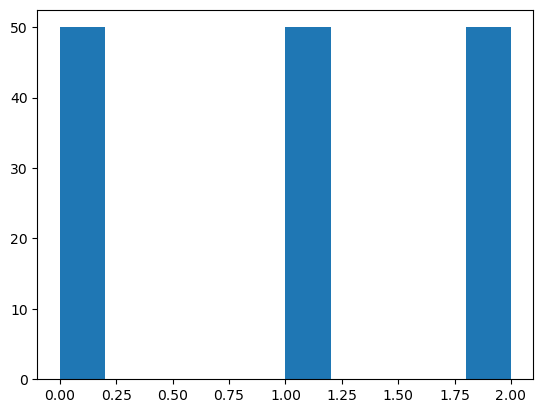

In [54]:
plt.hist(df['species'])

## Breaking DataSet into independent & dependent variable

In [76]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [92]:
X.shape
y.shape

(150,)

### Splitting Dataset into test and train set

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [80]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### Dataset Normalization to avoid Biasness

In [84]:
x_train_norm = StandardScaler().fit(X_train).transform(X_train)
x_test_norm = StandardScaler().fit(X_test).transform(X_test)

# Model Selection

In [85]:
model = svm.SVC(kernel = 'rbf', gamma = 0.6)
model.fit(x_train_norm, y_train)

SVC(gamma=0.6)

### Prediction

In [88]:
pred = model.predict(x_test_norm)

## Accuracy Check through F1_score & Accuracy_score

In [95]:
acc = accuracy_score(y_test, pred)

In [94]:
f1 = f1_score(y_test, pred, average = 'weighted')

In [100]:
final_res = {
    'Model' : ['Support Vector Machine'],
    'Accuracy Score' : [acc],
    'F1 Score' : [f1]
}

In [108]:
table = pd.DataFrame(data = final_res).reset_index(drop = True)

In [109]:
table

,Model,Accuracy Score,F1 Score
0,Support Vector Machine,0.966667,0.967111
